In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os 

from skimage import io, transform
from PIL import Image as im
import cv2


from sklearn import datasets, svm, metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate


from __future__ import print_function
import keras
from keras.utils import np_utils
# from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [3]:
# not using this! 
def load_images(folder):
    images = [] 
    labels = []
    for filename in os.listdir(folder):
#         print(filename)
        image = io.imread(os.path.join(folder, filename))
        if image is not None:
            if filename[-5] == 'L':
                images.append(image)
#                 images.append(image)
                labels.append(filename[-6])
            # display_image(image)
    images =  np.asarray(images)
    labels = np.asarray(labels)
    return images, labels

In [4]:
# Loading the images using cv2. This will give us the right dimenstion (5, 32, 32, 3)
def load(folder):
    images = [] 
    labels = [] 
    for filename in os.listdir(folder):
        image = cv2.imread(os.path.join(folder, filename))
        if image is not None:
            if filename[-5] == 'L':
                image = cv2.resize(image, (32,32))
                images.append(image)
                labels.append(filename[-6])
    images =  np.asarray(images)
    labels = np.asarray(labels)
    return images, labels

In [5]:
def display_image(img):
    plt.figure()
    plt.imshow(img) 
    plt.show()  

In [6]:
# X_train, X_test = load_images('./try/')
# X_train.shape

(4, 128, 128)

In [7]:
# obtain the training and testing dataset from the data folder
X_train, Y_train = load('./data/train/')
X_test, Y_test = load('./data/test/')

print("X training dataset: ", X_train.shape)
print("Y training dataset: ", Y_train.shape)
print("X testing dataset: ", X_test.shape)
print("Y testing dataset: ", Y_test.shape)

X training dataset:  (9000, 32, 32, 3)
Y training dataset:  (9000,)
X testing dataset:  (1800, 32, 32, 3)
Y testing dataset:  (1800,)


In [8]:
X_train[444].shape
X_train[444]

array([[[47, 47, 47],
        [43, 43, 43],
        [41, 41, 41],
        ...,
        [45, 45, 45],
        [50, 50, 50],
        [50, 50, 50]],

       [[46, 46, 46],
        [45, 45, 45],
        [41, 41, 41],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [54, 54, 54]],

       [[42, 42, 42],
        [36, 36, 36],
        [38, 38, 38],
        ...,
        [45, 45, 45],
        [48, 48, 48],
        [45, 45, 45]],

       ...,

       [[43, 43, 43],
        [44, 44, 44],
        [43, 43, 43],
        ...,
        [53, 53, 53],
        [49, 49, 49],
        [51, 51, 51]],

       [[48, 48, 48],
        [51, 51, 51],
        [43, 43, 43],
        ...,
        [56, 56, 56],
        [49, 49, 49],
        [50, 50, 50]],

       [[52, 52, 52],
        [45, 45, 45],
        [45, 45, 45],
        ...,
        [52, 52, 52],
        [57, 57, 57],
        [50, 50, 50]]], dtype=uint8)

[0. 0. 0. 1. 0. 0.]


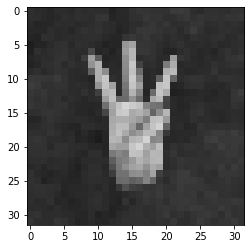

In [16]:
print(Y_train[444])
plt.imshow(X_train[444]);

In [17]:
num_classes = 6

Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
X_train[444]
X_test[444]

array([[[0.18039216, 0.18039216, 0.18039216],
        [0.16470589, 0.16470589, 0.16470589],
        [0.14509805, 0.14509805, 0.14509805],
        ...,
        [0.18431373, 0.18431373, 0.18431373],
        [0.16470589, 0.16470589, 0.16470589],
        [0.16078432, 0.16078432, 0.16078432]],

       [[0.18039216, 0.18039216, 0.18039216],
        [0.16078432, 0.16078432, 0.16078432],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.16862746, 0.16862746, 0.16862746],
        [0.15294118, 0.15294118, 0.15294118],
        [0.14509805, 0.14509805, 0.14509805]],

       [[0.12941177, 0.12941177, 0.12941177],
        [0.15294118, 0.15294118, 0.15294118],
        [0.12941177, 0.12941177, 0.12941177],
        ...,
        [0.18431373, 0.18431373, 0.18431373],
        [0.16862746, 0.16862746, 0.16862746],
        [0.15294118, 0.15294118, 0.15294118]],

       ...,

       [[0.16862746, 0.16862746, 0.16862746],
        [0.14901961, 0.14901961, 0.14901961],
        [0.16078432, 0

In [14]:
model_1 = Sequential()

model_1.add(Conv2D(16, (3, 3), strides = (2,2), padding='same',
                 input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))

model_1.add(Conv2D(32, (3, 3), strides = (2,2)))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [15]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(X_test, Y_test),
              shuffle=True)

Epoch 1/20
282/282 [==============================] - 2s 6ms/step - loss: 1.5794 - accuracy: 0.3711 - val_loss: 0.4156 - val_accuracy: 0.9561
Epoch 2/20
282/282 [==============================] - 1s 2ms/step - loss: 0.5788 - accuracy: 0.8163 - val_loss: 0.1148 - val_accuracy: 0.9706
Epoch 3/20
282/282 [==============================] - 1s 2ms/step - loss: 0.2750 - accuracy: 0.9150 - val_loss: 0.0632 - val_accuracy: 0.9789
Epoch 4/20
282/282 [==============================] - 1s 2ms/step - loss: 0.1968 - accuracy: 0.9391 - val_loss: 0.0468 - val_accuracy: 0.9856
Epoch 5/20
282/282 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9535 - val_loss: 0.0391 - val_accuracy: 0.9878
Epoch 6/20
282/282 [==============================] - 1s 2ms/step - loss: 0.1221 - accuracy: 0.9576 - val_loss: 0.0229 - val_accuracy: 0.9922
Epoch 7/20
282/282 [==============================] - 1s 2ms/step - loss: 0.1082 - accuracy: 0.9636 - val_loss: 0.0174 - val_accuracy: 0.9939
Epoch 

In [ ]:
'''
References 
 - https://github.com/evernext10/Hand-Gesture-Recognition-Machine-Learning

'''